# S&P 500 Index Forecasting using XGBoost

### Table of Contents

1. [Introduction](#1.-Introduction)

2. [Base Libraries](#2.-Base-Libraries)

3. [Data Loading and Preprocessing](#3.-Data-Loading-and-Preprocessing)

4. [Model Training and Validation](#4.-Model-Training-and-Validation)

5. [Actual vs. Predicted](#5.-Actual-vs-Predicted)

6. [Conclusions](#6.-Conclusions)

7. [References](#7.-References)


# 1. Introduction

In the dynamic world of finance, the S&P 500 Index stands as a critical benchmark of the U.S. stock market's health, representing the performance of 500 large companies listed on stock exchanges in the United States. Forecasting its movements is an endeavor that financial analysts, traders, and economists have pursued for decades, aiming to gain a competitive edge in the market. While traditional methods have offered insights, the recent surge in computational power and advanced algorithms has opened up new avenues for predicting stock market indices with increased accuracy.





# 2. Base Libraries

In this notebook, several key Python libraries are utilized to facilitate the analysis. **numpy** (np) serves as the foundation for numerical operations, enabling efficient handling of arrays and mathematical functions. **pandas** (pd) is instrumental in data manipulation and analysis, providing flexible data structures like DataFrames that simplify the ingestion and processing of our dataset. For visualization, **matplotlib.pyplot** (plt) is employed, offering a range of plotting tools to effectively illustrate data trends and results. The **train_test_split** function from sklearn.model_selection aids in segregating the dataset into training and test subsets, ensuring a robust evaluation of our model. Several metrics, including **mean_squared_error**, **mean_absolute_error**, and **r2_score** from sklearn.metrics, are utilized to gauge the model's performance and accuracy. Lastly, **XGBoost** (xgb) is incorporated, a gradient boosting framework known for its powerful predictive capabilities, especially in the realm of regression and classification tasks

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyentrp import entropy as ent
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb

# 3. Data Loading and Preprocessing

In this data preprocessing step, the S&P 500 index data is loaded from a CSV file using pandas. The 'Date' column, initially read as a string, is converted to a datetime format for better time series handling. Subsequently, this 'Date' column is set as the index for the DataFrame, providing a time-ordered structure. Any rows with null or missing values are removed to ensure data consistency. Additionally, rows where the 'S&P500' column has a value of zero are excluded, as these could indicate potential data errors or missing entries. After these preprocessing steps, the first ten rows of the cleaned dataset are displayed to give an initial overview.

In [2]:
# Load the data and perform basic preprocessing
data = pd.read_csv('data/sp500_index.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Handle null values
data.dropna(inplace=True)

# Remove rows with zeros in 'S&P500' column as they might represent missing data or errors
data = data[data['S&P500'] != 0]

# Display the first few rows of the cleaned dataset
data.head(10)


,S&P500
Date,
2013-10-14,1710.14
2013-10-15,1698.06
2013-10-16,1721.54
2013-10-17,1733.15
2013-10-18,1744.50
2013-10-21,1744.66
2013-10-22,1754.67
2013-10-23,1746.38
2013-10-24,1752.07


This data visualization represents a line chart detailing the trajectory of the S&P 500 Index from 2014 to 2024. The horizontal axis delineates the time frame, while the vertical axis quantifies the index's value, ranging from approximately 2000 to 4500. Observing the decade-long span, the index manifests a consistent rise from 2014 to mid-2017, encounters fluctuations and a notable decline around 2018, and subsequently surges from early 2019 to 2020. A sharp descent in 2020 is evident, presumably indicative of an economic downturn, yet this is followed by a swift recovery leading into 2022. The final years, from 2022 to 2024, portray a period of relative stability with minor oscillations, suggesting a consolidative market phase.

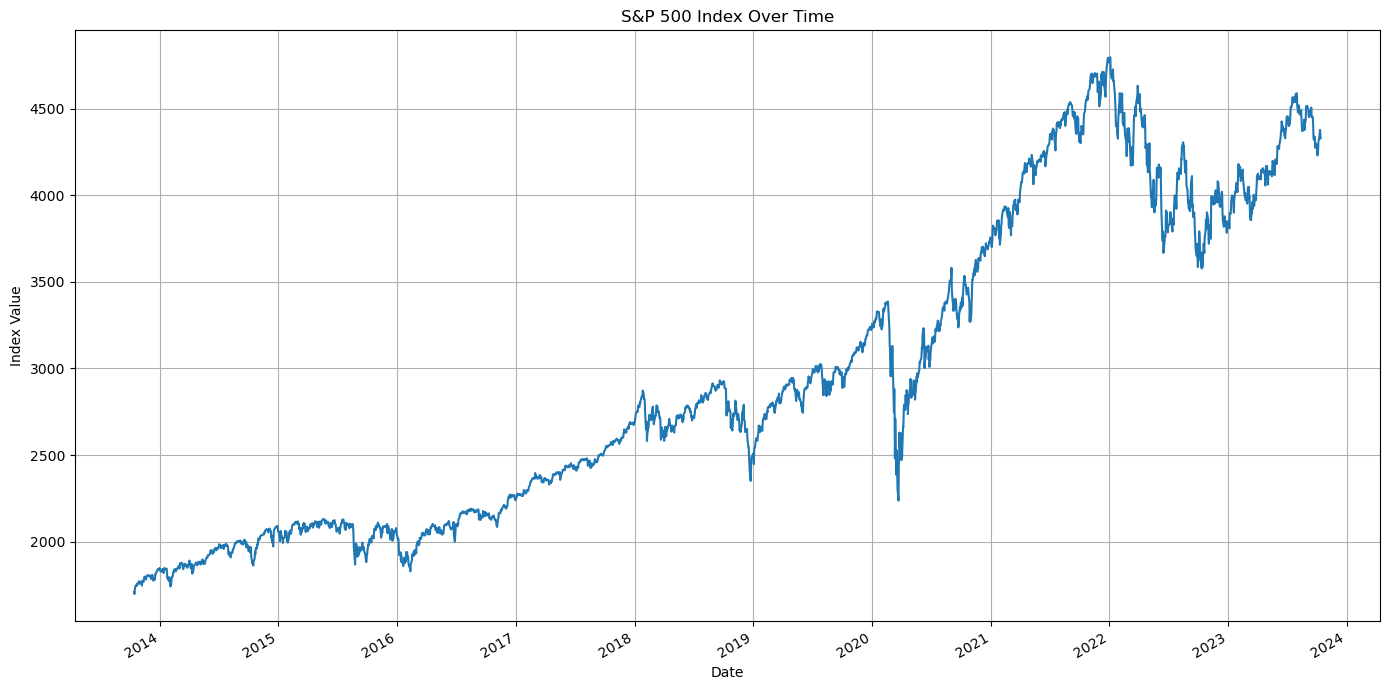

In [3]:
# Visualize the data
plt.figure(figsize=(14, 7))
data['S&P500'].plot(title='S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Model Training and Validation

The next step is centered around organizing a dataset for the purpose of time series forecasting. Initially, the feature matrix **X** is derived from a dataframe termed **features_df**. This matrix represents the input attributes or predictors. The .values attribute is employed to procure the underlying numpy array from the dataframe, transforming **X** into a two-dimensional array. Subsequently, the target variable y is established using values from the 'S&P500' column of the **data** dataframe. This variable embodies the values one aims to forecast, seemingly representing the S&P 500 stock index in this scenario.

In [4]:
# Prepare dataset for forecasting
X = data.values

# Adjust the target values 'y' to match the length of 'X'
y = data['S&P500'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

To facilitate model evaluation and validation, the data undergoes a split into training and test subsets using the **train_test_split** function, commonly sourced from the **sklearn.model_selection** module. The **test_size=0.2** parameter designates 20% of the data for testing, allocating the remaining 80% for training. Critically, the **shuffle=False** parameter ensures the data retains its chronological sequence when split. This is pivotal for time series forecasting to avoid introducing lookahead bias and to ensure the model is trained on past data and validated on more recent data, reflecting a realistic forecasting scenario.

In the next step, is the training and application of the XGBoost regression model for forecasting. An instance of the **XGBRegressor** class from the **xgb** library is initialized with specific parameters: the objective is set to 'reg:squarederror' to focus on minimizing squared errors, a common choice for regression tasks, and it's specified to use 100 boosting rounds (**n_estimators=100**) and a learning rate of 0.1 (**learning_rate=0.1**). Once initialized, the model is trained using the **fit** method on the training data, denoted as **X_train** and **y_train**. Post-training, predictions on the test dataset (**X_test**) are generated using the **predict* method, with the results stored in the **y_pred** variable.

In [5]:
# Train the XGBoost model and compute metrics
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

To measure the model's efficiency, three metrics were used:
* **Root Mean Squared Error (RMSE)**: quantifies the average magnitude of errors between predicted and observed values. Squared differences penalize larger errors, offering insight into the model's error spread.

* **Mean Absolute Error (MAE)**: averages the absolute differences between predicted and actual values. Provides a straightforward representation of the average error magnitude.

* **R-squared (Coefficient of Determination)**: shows the variance proportion in the dependent variable that's predictable from the independent variables. A value near 1 indicates the model explains most of the response variability in its predictions.

In [6]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

Root Mean Squared Error (RMSE): 52.67
Mean Absolute Error (MAE): 21.41
R-squared (Coefficient of Determination): 0.97


The provided results reflect the performance of an XGBoost model, trained on the S&P 500 index data:

* **Root Mean Squared Error (RMSE) of 52.67**: This indicates that, on average, the model's predictions deviate by approximately 52.67 points from the actual values of the S&P 500 index. Given the scale of the S&P 500, which often spans several thousand points, this RMSE might be considered relatively small, but it would depend on the specific use case and acceptable margins of error.

* **Mean Absolute Error (MAE) of 21.41**: This means that, on average, the model's predictions are off by an absolute value of 21.41 points from the actual S&P 500 values. This metric provides a straightforward understanding of the model's error magnitude without the influence of outliers.

* **R-squared value of 0.97**: A score of 0.97 implies that the model explains 91% of the variance in the S&P 500 index. This is quite high, suggesting that the model has done a commendable job in capturing the patterns present in the data.

# 5. Actual vs Predicted

The graph depicts a comparison between the actual performance of the S&P 500 Index and its predicted values over a specific time period. The S&P 500 Index is a benchmark often used to represent the U.S. stock market's performance. The solid blue line represents the real, observed values of the index, while the dashed red line represents predicted or forecasted values, possibly obtained from a model or algorithm.

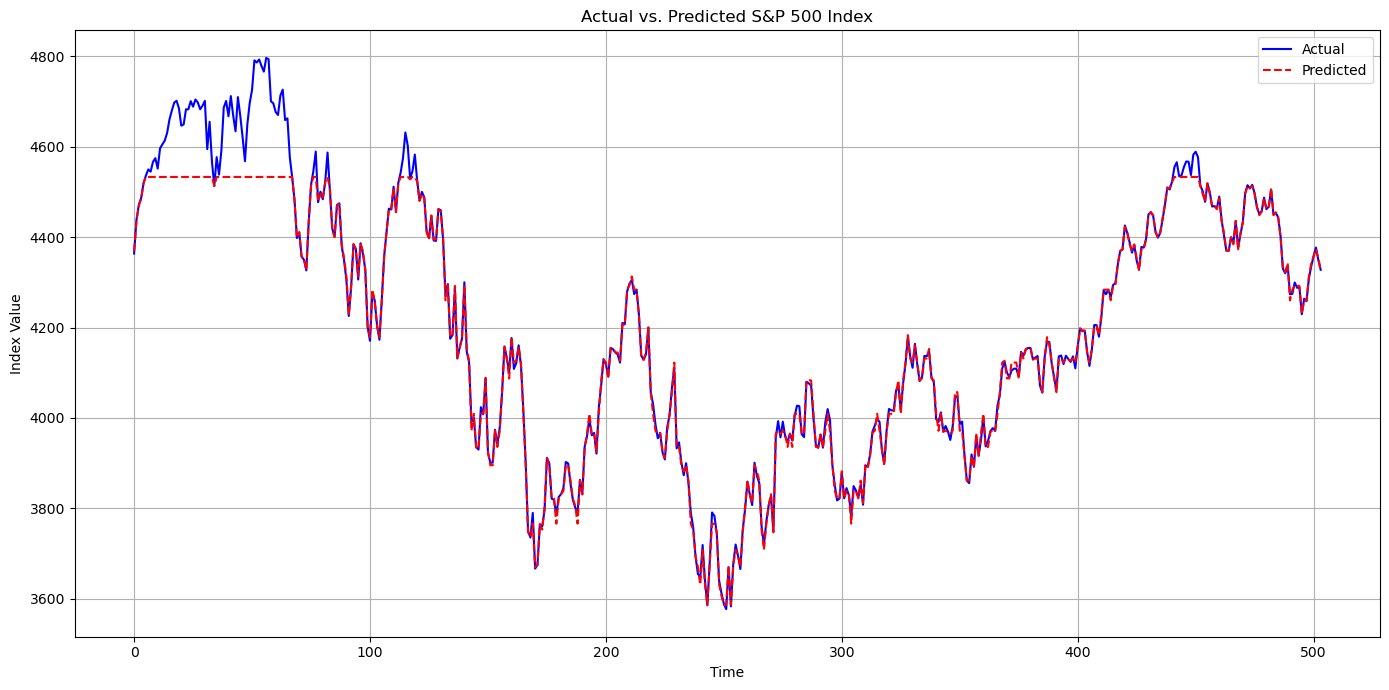

In [7]:
# Visualize actual vs. predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs. Predicted S&P 500 Index')
plt.xlabel('Time')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Both lines follow a similar trend, indicating that the prediction model captures the general movement of the index. However, there are instances where the predicted values deviate from the actual values, suggesting moments of inaccuracy in the forecast. Such deviations can arise from various factors, including unforeseen market events, limitations in the prediction model, or abrupt changes in market sentiment. Analyzing these discrepancies can provide insights into the model's accuracy and potential areas for improvement.

# 6. Conclusions

This notebook delves into a modern approach, leveraging the power of the XGBoost algorithm to forecast the S&P 500 Index. XGBoost is a gradient boosting algorithm renowned for its predictive capabilities. Through this analysis, we aim to demonstrate a robust method for time series forecasting, offering valuable insights into the future movements of the S&P 500 Index

# 7. References

[1] Chen, F., Gao, J., & Zhang, Z. (2022). US Stocks Market Movements Prediction: Classification of SP-500 Using Machine Learning Technology. doi:10.54691/bcpbm.v26i.2068

[2] Alfalih, A. (2022). ESG disclosure practices and financial performance: a general and sector analysis of SP-500 non-financial companies and the moderating effect of economic conditions. doi:10.1080/20430795.2022.2150511

[3] Wang, J., Cheng, Q., & Dong, Y. (2022). An XGBoost-based multivariate deep learning framework for stock index futures price forecasting. doi:10.1108/k-12-2021-1289

[4] Kiselev, E. (2018). Contrarian investment strategies in the US equity market on the base of constituents of Standard and Poor’s 500 Index in the years 1990–2012.

[5] Patel, N., & Welch, I. (2016). Extended Stock Returns in Response to S&P 500 Index Changes. doi:10.2139/ssrn.2638660

[6] Zhu, H., & Zhu, A. (2022). Application Research of the XGBoost-SVM Combination Model in Quantitative Investment Strategy. doi:10.1109/ICSAI57119.2022
